<a href="https://colab.research.google.com/github/edsonportosilva/OptiCommPy/blob/main/examples/test_dsp_core_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test syncrhonization utils

In [1]:
if 'google.colab' in str(get_ipython()):    
    ! git clone -b main https://github.com/edsonportosilva/OptiCommPy
    from os import chdir as cd
    cd('/content/OptiCommPy/')
    ! pip install . 

In [2]:
from optic.dsp.core import finddelay, pnorm
from optic.dsp.synchronization import syncDataSequences
from optic.utils import parameters
from optic.models.tx import pamTransmitter
import matplotlib.pyplot as plt
import numpy as np


c:\Users\edson.DESKTOP-54IJM4F\anaconda3\envs\opticommpy-env\Lib\site-packages\cupyx\jit\_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [3]:
%load_ext autoreload
%autoreload 2

## Test sequence syncronizer

Calculated delay after synchronization:
Polarization 1: 0 samples
Polarization 2: 0 samples
Original signal length: 24000 samples
Delayed repeated signal length: 551667 samples
Synchronized signal length: 551667 samples
Synchronized symbols length: 137917 symbols


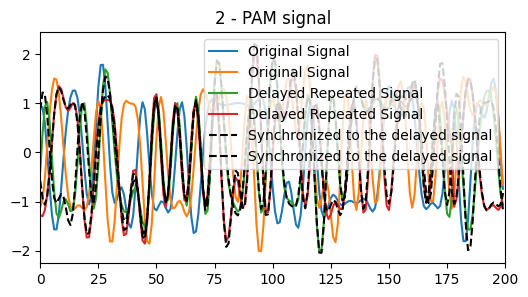

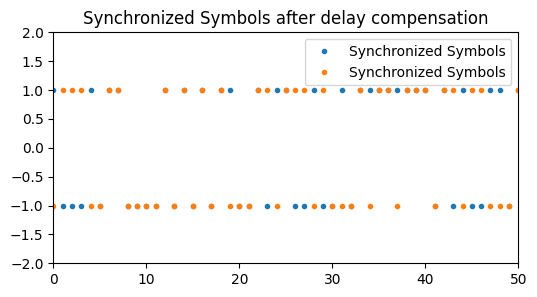

In [13]:
# generate test signal
paramTx = parameters()
paramTx.M = 2
paramTx.SpS = 4
paramTx.nBits = 6000
paramTx.pulseType = 'rrc'
paramTx.pulseRollOff = 0.001
paramTx.nFilterTaps = 1023
paramTx.seed = 123
paramTx.nPolModes = 2
signal, symbols = pamTransmitter(paramTx)
signal = pnorm(signal**2 - np.mean(signal**2, axis=0))

if paramTx.nPolModes == 1:
    signal = signal.reshape(-1,1)

# repeat signal
signal_rep = np.tile(signal, (23, 1))

# add delay to repeated signal
delay = 178  # samples
signal_rep = np.roll(signal_rep, delay, axis=0)

# crop length
signal_rep = signal_rep[0:-333,:]  

# synchronize sequences
param = parameters()
param.SpS = paramTx.SpS
param.pulseType = paramTx.pulseType
param.rollOff = paramTx.pulseRollOff
param.reference = 'symbols'
param.M = paramTx.M
param.constType = 'pam'
signal_sync, symbols_sync1 = syncDataSequences(signal_rep, symbols, param)

plt.figure(figsize=(6,3))
plt.plot(signal[0:50*param.SpS], '-', markersize=3, label='Original Signal')
plt.plot(signal_rep[0:50*param.SpS], '-', markersize=3, label='Delayed Repeated Signal')
plt.plot(signal_sync[0:50*param.SpS], 'k--', markersize=3, label='Synchronized to the delayed signal')
plt.xlim(0, 50*param.SpS)
plt.legend(loc = 'upper right')
plt.title(f'{param.M} - PAM signal')

plt.figure(figsize=(6,3))
plt.plot(pnorm(symbols_sync1), '.', markersize=6, label='Synchronized Symbols')
plt.xlim(0, 50)
plt.ylim(-2, 2)
plt.title('Synchronized Symbols after delay compensation')
plt.legend(loc = 'upper right')

# print estimated delays
print(f'Calculated delay after synchronization:')
for ind in range(signal.shape[1]):
    print(f'Polarization {ind+1}: {finddelay(signal_rep[:, ind], signal_sync[:, ind])} samples')

# print lengths
print(f'Original signal length: {len(signal)} samples')
print(f'Delayed repeated signal length: {len(signal_rep)} samples')
print(f'Synchronized signal length: {len(signal_sync)} samples')
print(f'Synchronized symbols length: {len(symbols_sync1)} symbols')


Calculated delay after synchronization:
Polarization 1: 0 samples
Polarization 2: 0 samples
Original signal length: 24000 samples
Delayed repeated signal length: 551667 samples
Synchronized signal length: 551667 samples
Synchronized symbols length: 137916 symbols


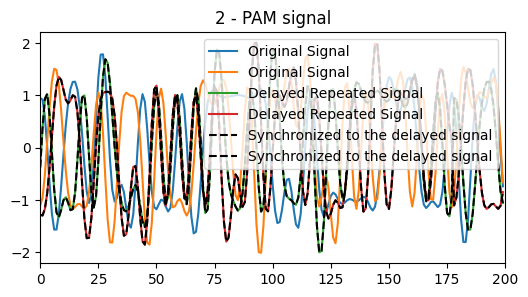

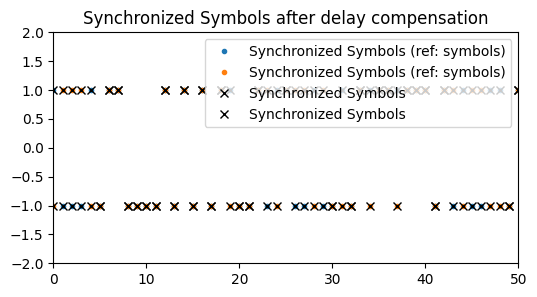

In [14]:
# generate test signal
paramTx = parameters()
paramTx.M = 2
paramTx.SpS = 4
paramTx.nBits = 6000
paramTx.pulseType = 'rrc'
paramTx.pulseRollOff = 0.001
paramTx.nFilterTaps = 1023
paramTx.seed = 123
paramTx.nPolModes = 2
signal, symbols = pamTransmitter(paramTx)
signal = pnorm(signal**2 - np.mean(signal**2, axis=0))

if paramTx.nPolModes == 1:
    signal = signal.reshape(-1,1)

# repeat signal
signal_rep = np.tile(signal, (23, 1))

# add delay to repeated signal
delay = 178  # samples
signal_rep = np.roll(signal_rep, delay, axis=0)

# crop length
signal_rep = signal_rep[0:-333,:]  

# synchronize sequences
param = parameters()
param.SpS = paramTx.SpS
param.pulseType = paramTx.pulseType
param.rollOff = paramTx.pulseRollOff
param.reference = 'signal'
param.M = paramTx.M
param.constType = 'pam'
signal_sync, symbols_sync2 = syncDataSequences(signal_rep, signal, param)

plt.figure(figsize=(6,3))
plt.plot(signal[0:50*param.SpS], '-', markersize=3, label='Original Signal')
plt.plot(signal_rep[0:50*param.SpS], '-', markersize=3, label='Delayed Repeated Signal')
plt.plot(signal_sync[0:50*param.SpS], 'k--', markersize=3, label='Synchronized to the delayed signal')
plt.xlim(0, 50*param.SpS)
plt.legend(loc = 'upper right')
plt.title(f'{param.M} - PAM signal')

plt.figure(figsize=(6,3))
plt.plot(pnorm(symbols_sync1), '.', markersize=6, label='Synchronized Symbols (ref: symbols)')
plt.plot(pnorm(symbols_sync2), 'kx', markersize=6, label='Synchronized Symbols')
plt.xlim(0, 50)
plt.ylim(-2, 2)
plt.title('Synchronized Symbols after delay compensation')
plt.legend(loc = 'upper right')

# print estimated delays
print(f'Calculated delay after synchronization:')
for ind in range(signal.shape[1]):
    print(f'Polarization {ind+1}: {finddelay(signal_rep[:, ind], signal_sync[:, ind])} samples')

# print lengths
print(f'Original signal length: {len(signal)} samples')
print(f'Delayed repeated signal length: {len(signal_rep)} samples')
print(f'Synchronized signal length: {len(signal_sync)} samples')
print(f'Synchronized symbols length: {len(symbols_sync2)} symbols')